In [52]:
import pandas as pd;

In [53]:
import matplotlib.pyplot as plt;

In [54]:
import numpy as np;

In [55]:
import random

In [56]:
%matplotlib inline

In [57]:
from scipy import stats

In [58]:
df=pd.read_csv("stroopdata.csv")

In [59]:
df.shape

(24, 2)

In [60]:
df.head(4)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687


# Basic Statistical Parameters

In [61]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


# Histograms

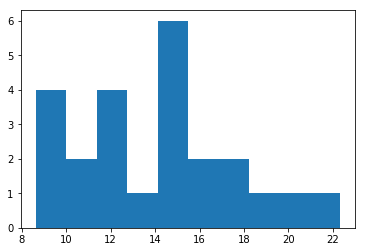

In [62]:
plt.hist(df.Congruent);

**Not normally distributed with positive skewness**

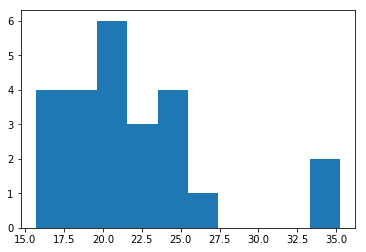

In [63]:
plt.hist(df.Incongruent);

**Not normally distributed with positive skewness and an outlier at 32-36**

# Boxplots

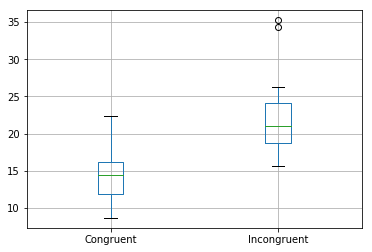

In [64]:
df.boxplot();

# Normality Test

In [65]:
k_c, p_c = stats.normaltest(df.Congruent)
p_c

0.653093396926963

**Null hypothesis is not rejected, distribution is normal**

In [66]:
k_i, p_i= stats.normaltest(df.Incongruent)

In [67]:
p_i

0.0013227189654814804

**Null hypothesis is rejected, distribution is not normal**

**Since for the Incongruent data the sample is not normal I decided to use bootstrapping.**

# Bootstrapping

In [68]:
random.seed(1234)

In [69]:
cong_sample_means=[]
cong_sample_std=[]
incong_sample_means=[]
incong_sample_std=[]
dif_means=[]
dif_std=[]
for i in range (1,10000):
    sample=df.sample(1000,replace = True)
    cong_sample_means.append(sample.Congruent.mean())
    incong_sample_means.append(sample.Incongruent.mean())
    cong_sample_std.append(np.std(sample.Congruent))
    incong_sample_std.append(np.std(sample.Incongruent))
    dif_means.append(sample.Congruent.mean()-sample.Incongruent.mean())
    dif_std.append(np.std(sample.Congruent)-np.std(sample.Incongruent))

0.10988615433601626

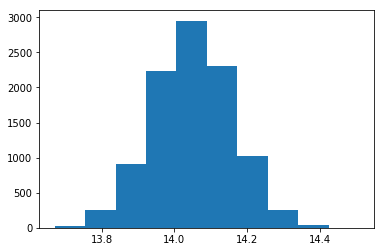

In [70]:
plt.hist(cong_sample_means);
np.std(cong_sample_means)

0.14739489261012265

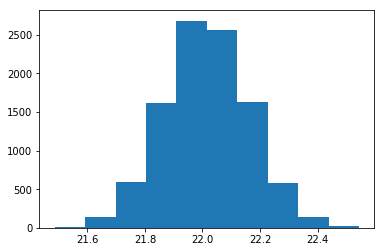

In [71]:
plt.hist(incong_sample_means);
np.std(incong_sample_means)

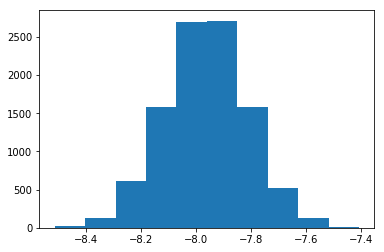

In [72]:
plt.hist(dif_means);

**The standard deviations were found to be different, we are making the assumption that they are equal to be able to perform the Z-test or T-test.**

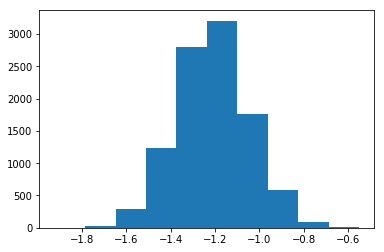

In [73]:
plt.hist(dif_std);

**The histogram of the differences between the means shows that the value zero in not present in the range, allowing us to conclude that there is always a difference between the two samples**

# Z-Test

**Z-test for the samples without bootstrapping**

    Null hypothesis H0=H1
    Alternative hypothesis H0!=H1

Null hypothesis assumes the means to be equal.

In [74]:
t, p= stats.ttest_rel(df.Congruent,df.Incongruent)
t,p

(-8.020706944109957, 4.1030005857111781e-08)

**Z-test for the samples after bootstrapping**

    Null hypothesis H0=H1
    Alternative hypothesis H0!=H1

Null hypothesis assumes the means to be equal.

In [77]:
t, p= stats.ttest_rel(cong_sample_means,incong_sample_means)
t,p

(-5283.3203884040031, 0.0)

**From the above tests it can be concluded that the averages are not equal and that the alternative hypothesis is correct.**

# Confidence Interval

**Confidence interval before bootstrapping**

In [80]:
import statsmodels.stats.api as sms

cm = sms.CompareMeans( sms.DescrStatsW(df.Incongruent),sms.DescrStatsW(df.Congruent))
print (cm.tconfint_diff(usevar='unequal'))

(5.504885145169359, 10.424698188163971)


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


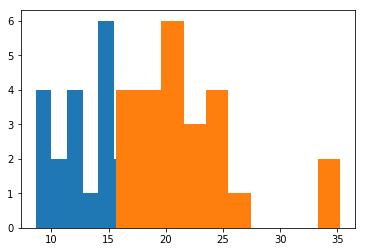

In [81]:
plt.hist(df.Congruent);
plt.hist(df.Incongruent);
plt.show()

**Confidence interval after bootstrapping**

In [82]:
new_df=pd.DataFrame({'Congruent':cong_sample_means,'Incongruent':incong_sample_means})

In [83]:
cm = sms.CompareMeans( sms.DescrStatsW(new_df.Incongruent),sms.DescrStatsW(new_df.Congruent))
print (cm.tconfint_diff(usevar='unequal'))

(7.9611882184577896, 7.9683961345775129)


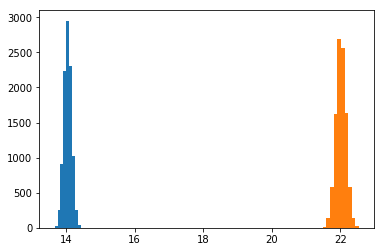

In [84]:
plt.hist(new_df.Congruent);
plt.hist(new_df.Incongruent);
plt.show()

Type I error is zero 

### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

** Both of these variable are dependent variables. The independent variable is the cognitive ability of the subjects. **

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Please see the code section for the tests. Two methods were used. The first hypothesis test was for the means to be equal which was rejected. The second null hypothesis was for the mean of the congruent sample to be greater or equal to incongruent which was also rejected. The alternative hypothesis is accepted for both tests. The samples have been assumed to be paired and a two tailed paired t-test has been performed. Since the subjects do not change between the two samples we can assume the two sets to be paired.**

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

**Refer to the code section**

--write answer here--

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

**Refer to the code section**

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

**Refer to the code section**

The results, as expected, show that there is a difference between the averages of the two samples and that the average for the incongruent sample is greater than the congruent one. This results suppports the various theories replated to the Stroop effect but does no necessarily indicate which theory might be more important. 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Refer to reference 5**

# References: